# Работа с таблицами

В этой работе на примере набора данных для исследования полового диморфизма черепах мы потренируемся отвечать на вопросы, возникающие при первом знакомстве с большим сложным набором данных. Это вопросы о полноте данных, о количественном составе разных категориальных показателей, об экстремальных значениях.



In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Набор данных

[Правило Ренча](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D0%A0%D0%B5%D0%BD%D1%87%D0%B0) (Rensch’s Rule)(положительная аллометрия полового диморфизма в размерах) 
решили проверить на черепахах {cite}`regis2017`. Для этого интегрировали данные из разных работ - в каких-то измерялись размеры и масса, в каких-то только размеры. Таблица неполная, так как информация по многим позициям отсутствует. Это пример реальных данных, с которыми приходится работать.

Набор данных представлен в исходном виде, в котором он находится в открытом доступе в виде приложения к публикации - это файл Excel `Data_S1_Complete_Dataset.xlsx` размером 95Кб.

In [2]:
#https://dfzljdn9uc3pi.cloudfront.net/2017/2914/1/Data_S1_Complete_Dataset.xlsx
D = pd.read_excel(r'd/Data_S1_Complete_Dataset.xlsx', skiprows=5)
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carapace data used for phylogenetic analysis  241 non-null    object 
 1   Mass data used for phylogenetic analysis      146 non-null    object 
 2   Max mass used?                                9 non-null      object 
 3   Max SCL used?                                 19 non-null     object 
 4   Captive?                                      12 non-null     object 
 5   Combined populations?                         3 non-null      object 
 6   Genus                                         692 non-null    object 
 7   Species                                       692 non-null    object 
 8   Common Name                                   306 non-null    object 
 9   Family                                        692 non-null    obj

В таблице 692 записи со значениями в 27 колонках.

Из сводки по колонкам по количеству ненулевых значений (non-null) можно видеть, что полностью заполнены лишь Family (Семейство), Genus (Род) и Species (Вид).
Остальные колонки заполнены частично. 


Посмотрим список мест сбора данных.

In [3]:
D.Locality.value_counts()

Orang National Park, Assam state, India                                  15
Bangladesh                                                                8
Madagascar                                                                6
Savannah River Plant and Capers Island, South Carolina                    6
Papua Province, New Guinea Island, Indonesia                              6
                                                                         ..
Kimberley, South Africa                                                   1
Carrizo Plain Ecological Reserve, San Luis Obisipo County, California     1
Beaver Creek, Tar Creek Superfund Site, Ottawa County, Oklahoma           1
Anakao, Atsimo-Andrefana region, Madagascar                               1
Egmont Key island, Tampa Bay, Florida 27°36'04"N 82°45'40"W               1
Name: Locality, Length: 226, dtype: int64

На выходе мы получили серию (`pandas.Series`) с частотой упоминания в таблице отдельных мест (Locality), а в качестве индекса к этим значениям использованы названия этих мест.

Сколько всего раз встречается Бразилия?

In [4]:
#_ - это ссылка на вывод из предыдущей ячейки
_[_.index.str.contains('Brazil')].sum()

22

In [5]:
# теперь временная переменная _ занята выводом предыдущей ячейки = 22
# для ссылки на вывод из предпредыдущей ячейки используйте __
__[__.index.str.contains('India')].sum()

23

Чтобы не путаться во временных переменных - лучше ссылаться на исходные переменные, или создавать временные переменные с понятным именем.

В следующей ячейке выборку по условию присутствия в строке Locality подстроки 'Turk' мы сохраняем в переменную (подставляем слева от работающего выражения имя переменной и `=`. 
Во второй строке мы повторяем имя переменной, чтобы сразу вывести на экран содержимое полученной переменной.

In [6]:
Cherepashki_Turkii = D[D.Locality.str.contains('Turk')==True]
Cherepashki_Turkii

,Carapace data used for phylogenetic analysis,Mass data used for phylogenetic analysis,Max mass used?,Max SCL used?,Captive?,Combined populations?,Genus,Species,Common Name,Family,...,F Max Mass (g),Pop Max Mass (g),M Max SCL (mm),F Max SCL (mm),Pop Max SCL (mm),KWR notes,Mass Source,SCL Original Source,SCL Dataset Source,secondary mass source
195,yes,NaN,NaN,NaN,NaN,NaN,Emys,orbicularis,European Pond Turtle,Emydidae,...,750.7,750.7,156.8,166.6,166.6,NaN,"Ayaz, D., Fritz, U., Atatur, M. K., Mermer, A....",NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,Emys,orbicularis,European pond turtle,Emydidae,...,680.0,680.0,138.0,162.0,162.0,NaN,"Auer, M., and E. Taskavak. 2004. Population St...",NaN,NaN,NaN
403,yes,yes,NaN,NaN,NaN,NaN,Mauremys,rivulata,Western Caspian turtle,Geoemydidae,...,823.0,823.0,142.0,18.1,18.1,NaN,"Güçlü, O., and O. Türkozan. 2010. Population S...",NaN,NaN,NaN
404,NaN,NaN,NaN,NaN,NaN,NaN,Mauremys,rivulata,Western Caspian turtle,Geoemydidae,...,878.0,878.0,205.0,188.0,205.0,NaN,"Auer, M., and E. Taskavak. 2004. Population St...",NaN,NaN,NaN
633,NaN,yes,NaN,NaN,NaN,NaN,Agrionemys,horsfieldii,Central Asian tortoise,Testudinidae,...,NaN,NaN,NaN,NaN,NaN,NaN,"Ataev, C.A. 1997. Reptiles of the autonomous r...",NaN,NaN,NaN


По размеру выборки понятно, что найдено 5 записей, соответствующих запросу.

Чтобы получить информацию по конкретной записи можно использовать индекс. В данном случае индекс строчки - это ее номер, а индекс колонки - это ее название.

In [7]:
D.loc[633, 'Mass Source']

'Ataev, C.A. 1997. Reptiles of the autonomous republic of Turkmenistan. Chelonian Conservation and Biology 2:627-634.'

Для удобства можно указывать только список нужных колонок, выписав их в отдельную переменную.

In [8]:
kk=['Genus','Species','Common Name','Family','M Mass (g)','F Mass (g)','N','Locality','M SCL (mm)','F SCL (mm)','Mass Source']
D.loc[633,kk]

Genus                                                 Agrionemys
Species                                              horsfieldii
Common Name                               Central Asian tortoise
Family                                              Testudinidae
M Mass (g)                                                 684.5
F Mass (g)                                                1223.0
N                                                            NaN
Locality                                            Turkmenistan
M SCL (mm)                                                   NaN
F SCL (mm)                                                   NaN
Mass Source    Ataev, C.A. 1997. Reptiles of the autonomous r...
Name: 633, dtype: object

Для выборки центральноазиатских черепах, описанной в работе Атаева (1997), указываются только средние показатели массы самок и самцов, а измерений длины карапакса (`M SCL (mm)`, `F SCL (mm)`)  нет, поэтому на месте отсутствующих данных специальное число без значения `NaN`.

Также использование подстрок для поиска по текстовым колонкам надо использовать с осторожностью. Для точности вместо одной короткой подстроки иногда может потребоваться использовать несколько запросов с длинной подстрокой, например, "Turkey" и "Turkish".

Кроме средних значений размеров и массы, которые использованы для проверки правила Ренча, интерес представляют колонки с максимально зарегистрированным размером для особей разных полов и для популяций в целом.
```
M Max Mass (g)                                  126 non-null float64
F Max Mass (g)                                  127 non-null float64
Pop Max Mass (g)                                113 non-null float64
M Max SCL (mm)                                  271 non-null float64
F Max SCL (mm)                                  272 non-null float64
Pop Max SCL (mm)                                125 non-null float64 
```

Прочие колонки (первые шесть и последние 5) содержат информацию с уточнением обстоятельств получения данных для данных случаев.
Это так называемая *мета-информация*.
Малоинформативные колонки можно вообще удалить из рабочей таблицы на время анализа.

In [9]:
D=D.iloc[:,6:-5]

## Анализ полноты набора данных

Для анализа полового диморфизма каждая запись о популяции должна содержать размер женской особи и мужской особи.

**Вопрос: сколько размеров без пары?**

Первая проверка, сколько мужских без женских?

In [10]:
D[ D['M SCL (mm)'].notnull() & D['F SCL (mm)'].isnull() ]

,Genus,Species,Common Name,Family,M Mass (g),F Mass (g),N,Locality,M SCL (mm),F SCL (mm),M Max Mass (g),F Max Mass (g),Pop Max Mass (g),M Max SCL (mm),F Max SCL (mm),Pop Max SCL (mm)


Вторая проверка, сколько женских без мужских?

In [11]:
D[ D['M SCL (mm)'].isnull() & D['F SCL (mm)'].notnull() ]

,Genus,Species,Common Name,Family,M Mass (g),F Mass (g),N,Locality,M SCL (mm),F SCL (mm),M Max Mass (g),F Max Mass (g),Pop Max Mass (g),M Max SCL (mm),F Max SCL (mm),Pop Max SCL (mm)
156,Cycloderma,frenatum,Zambezi flapshell turtle,Trionychidae,NaN,NaN,"1M, 1F","Zambezi River, southern Africa",NaN,560.0,13500.0,11400.0,NaN,NaN,NaN,NaN
466,Pelomedusa,subrufa,helmeted turtle,Pelomedusidae,NaN,NaN,NaN,Sub-Saharan Africa,NaN,290.0,3000.0,2200.0,3000.0,325.0,NaN,NaN
471,Pelusios,adansonii,Adanson's turtle,Pelomedusidae,NaN,NaN,NaN,Senegal,NaN,220.0,650.0,1620.0,NaN,NaN,238.0,NaN


In [12]:
_.shape

(3, 16)

В трех случаях указаны только женские размеры.
Для Pelomedusa 	subrufa (№ 466) правда указан максимальный размер самца.

Можно заметить, что все три вида - морские черепахи. Поэтому становится понятным почему нет самцов.
Вероятно, замеры самок производились во время кладки яиц, когда самки черепах выползают из воды на песок. Самцы же в это время плавали где-то в море.

## Анализ корректности категорий

Для сравнительного анализа часто необходимо группировать наблюдения. В этом наборе данных группировку логично делать по систематическому признаку - Семейству (Family).


In [13]:
D.Family.value_counts().sort_index()

Carettochelyidae      4
Chelidae             87
Cheloniidae          17
Chelydridae          13
Chelydridae           2
Dermatemydidae        5
Dermochelyidae        3
Emydidae            157
Geoemydidae         114
Kinosternidae        66
Pelomedusidae        10
Platysternidae        2
Podocnemididae       22
Testudinidae        157
Trionychidae         33
Name: Family, dtype: int64

Обратите внимание, что Chelydridae встречаются два раза. Это означает, что эти названия различаются на один невидимый символ. 

In [14]:
D.Family.unique()

array(['Chelidae', 'Emydidae', 'Testudinidae', 'Trionychidae',
       'Geoemydidae', 'Cheloniidae', 'Carettochelyidae', 'Chelydridae ',
       'Chelydridae', 'Kinosternidae', 'Dermatemydidae', 'Dermochelyidae',
       'Podocnemididae', 'Pelomedusidae', 'Platysternidae'], dtype=object)

Отбираем все с ошибочным написанием и заменяем значение в колонке Family на правильное.

In [15]:
D.loc[D.Family=='Chelydridae ','Family']='Chelydridae'

D.Family.unique()

array(['Chelidae', 'Emydidae', 'Testudinidae', 'Trionychidae',
       'Geoemydidae', 'Cheloniidae', 'Carettochelyidae', 'Chelydridae',
       'Kinosternidae', 'Dermatemydidae', 'Dermochelyidae',
       'Podocnemididae', 'Pelomedusidae', 'Platysternidae'], dtype=object)

Если посмотреть на ту же проблему с названиями родов, то окажется, что это типичная ситуация для этой таблицы.

In [16]:
sum(D.Genus.str.endswith(' '))  #проверяем, что строка с названием рода оканчивается пробелом

131

Примерно каждое пятое название рода оканчивается пробелом. Т.е. авторы не придавали этому значения. Когда строки содержат пробелы спереди или сзади как правило это не влияет на их смысловое содержание. Для обрезания крайних пробелов существует специальная функция `strip()`, после применения которой дублей не остаётся.

In [17]:
unique(D.Genus.str.strip())

array(['Acanthochelys', 'Agrionemys', 'Apalone', 'Aspideretes',
       'Astrochelys', 'Batagur', 'Caretta', 'Carettochelys', 'Chelodina',
       'Chelonia', 'Chelonoidis', 'Chelus', 'Chelydra', 'Chersina',
       'Chitra', 'Chrysemys', 'Claudius', 'Clemmys', 'Cuora', 'Cyclemys',
       'Cycloderma', 'Deirochelys', 'Dermatemys', 'Dermochelys',
       'Dipsochelys', 'Dogania', 'Elseya', 'Elusor', 'Emydura', 'Emys',
       'Eretmochelys', 'Erymnochelys', 'Geochelone', 'Geoclemys',
       'Glyptemys', 'Gopherus', 'Graptemys', 'Hardella', 'Heosemys',
       'Homopus', 'Hydromedusa', 'Indotestudo', 'Kinixys', 'Kinosternon',
       'Kinosternum', 'Lepidochelys', 'Leucocephalon', 'Lissemys',
       'Macrochelys', 'Malaclemys', 'Malacochersus', 'Malayemys',
       'Manouria', 'Mauremys', 'Melanochelys', 'Mesoclemmys', 'Morenia',
       'Myuchelys', 'Nilssonia', 'Notochelys', 'Palea', 'Pangshura',
       'Pelodiscus', 'Pelomedusa', 'Peltocephalus', 'Pelusios',
       'Phrynops', 'Platemys', 'Pla

В подобном случае операцию приведения строк в порядок можно делать сразу после загрузки набора данных. Например, поменять все значения из колонки на эти же значения, но исправленные.
```py
D.Genus = D.Genus.str.strip()
```
Похожие операции стандартизации могут потребовать нестандартные сокращения, нестандартные указания даты и времени, строки с разным регистром символов и др.

После "ремонта" набора данных его желательно сохранить в файле с другим именем для дальнейшей работы. Мы этого делать не будем, поскольку преследуем учебные цели.

## Расчёт соотношений показателей

[Правило Ренча](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D0%A0%D0%B5%D0%BD%D1%87%D0%B0) (Rensch’s Rule)  - пример [аллометрии](https://ru.wikipedia.org/wiki/Аллометрия).
В 1950 году Rensch впервые описал, что в группах родственных видов половой диморфизм в размерах тела более выражен у крупных видов.

Были найдены исключения. Например, правило Ренча не соблюдается у сов
{cite}`abouheif1997`.
У птиц выраженность полового диморфизма была связана с половым отбором.
Если поделить на группы по системе спаривания, то правило выражено только у многоженцев (Polygyny)
{cite}`dale2007`
({numref}`rench_birds`).

::: {figure} rench_birds
![](i/rench_birds.jpg)

Стандартизированный размерный диморфизм (log male wing length−log female wing length) по сравнению с размером самцов в подсемействах с различными системами спаривания. Полигиния связана с положительной аллометрией (т. е. наклон графиков > 0 ), а полиандрия связана с отрицательной аллометрией (т. е. наклоны < 0).
:::


Для визуализации соотношения между показателями используют скаттерограмму. Сопоставим размеры мужских и женских карапаксов для одного из семейств - Сухопутные черепахи.

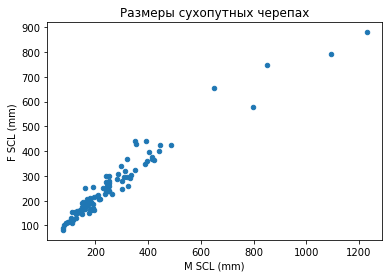

In [18]:
D1 = D[(D.Family=='Testudinidae')]
D1.plot('M SCL (mm)','F SCL (mm)', kind='scatter', marker='o');
title('Размеры сухопутных черепах');

Видно, что крупные виды c панцирем более полуметра сильно выпадают из группы. Чтобы смягчить различия зададим логарифмическую шкалу.

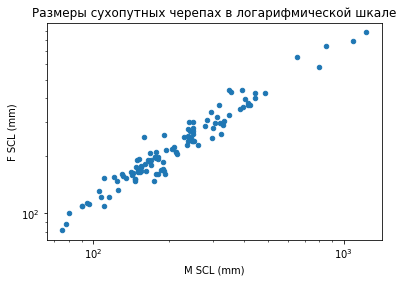

In [19]:
D1.plot('M SCL (mm)','F SCL (mm)', kind='scatter', marker='o', loglog=True);
title('Размеры сухопутных черепах в логарифмической шкале');

Факт наличия специального параметра для отображения логарифмических шкал говорит о том, что логарифмирование является стандартным приёмом при разведочном анализе данных.

## Расчет SSD

$$  SSD = log(X_{male}) - log(X_{female})$$

Согласно правилу Ренча sexual size dimorphism (SSD) зависит от общего размера тела в группе близкородственных видов. (Если самец крупнее - SSD растет, и наоборот).

Рассчитаем диморфизм для длины карапакса и для массы.

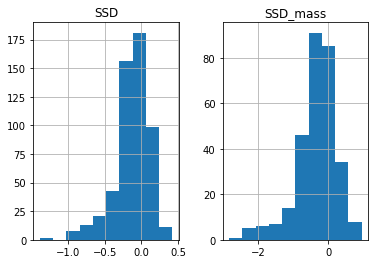

In [20]:
D['SSD'] = log(D['M SCL (mm)']) - log(D['F SCL (mm)'])
D['SSD_mass'] = log(D['M Mass (g)']) - log(D['F Mass (g)'])
D.hist(['SSD','SSD_mass']);

Создадим колонки с логарифмированными значениями для задания оси абсцисс в будущем рисунке.

In [21]:
D['log_size'] = log(D['M SCL (mm)'])
D['log_mass'] = log(D['M Mass (g)'])

Построим линейные зависимости по семействам. Посчитаем, сколько видов с данными есть по каждому семейству.

In [22]:
kk=['M SCL (mm)','F SCL (mm)','M Mass (g)','F Mass (g)']
D.groupby('Family')[kk].count()

,M SCL (mm),F SCL (mm),M Mass (g),F Mass (g)
Family,,,,
Carettochelyidae,3,3,0,0
Chelidae,74,74,34,34
Cheloniidae,15,15,6,6
Chelydridae,9,9,10,10
Dermatemydidae,2,2,4,4
Dermochelyidae,2,2,2,2
Emydidae,118,118,69,69
Geoemydidae,99,99,47,47
Kinosternidae,50,50,21,21


Оставим только те семейства, в которых представлено более, чем 5 видов.

In [23]:
popular_family = _[_['M Mass (g)']>5].index
popular_family

Index(['Chelidae', 'Cheloniidae', 'Chelydridae', 'Emydidae', 'Geoemydidae',
       'Kinosternidae', 'Podocnemididae', 'Testudinidae', 'Trionychidae'],
      dtype='object', name='Family')

Отберем выборку представителей только этих семейств. Будьте внимательны, если создаете переменные, отличающиеся всего на один символ (тут добавлен знак подчеркивания).

In [24]:
D_ = D[D.Family.isin(popular_family)]

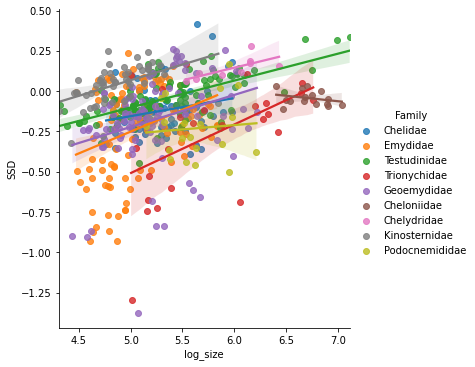

In [25]:
sns.lmplot(x='log_size', y='SSD', data=D_, hue='Family');

Как видно из рисунка в большинстве семейств правило Ренча соблюдается - линия тренда идет вверх при увеличении размера. У некоторых семейств (Podocnemididae) зависимость выражена слабо, и у одного (Cheloniidae) - слабо-отрицательная.

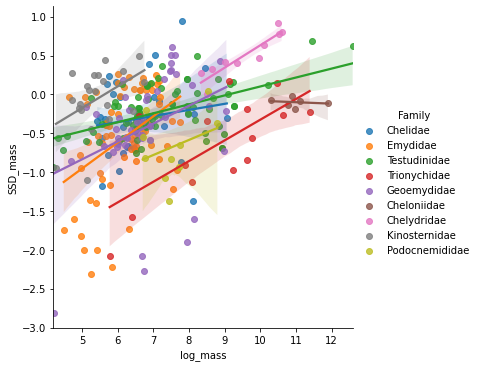

In [26]:
sns.lmplot(x='log_mass', y='SSD_mass', data=D_, hue='Family');

Сходная картина с межполовыми различиями в массе.

Степень выраженности аллометрического правила оценивают по углу наклона линии тренда - или коэффициенту $a$ в уравнении $y= ax+b$.

## Перегруппировка

Попробуем проверить пару гипотез, связано ли соблюдение правила Ренча с образом жизни и с типом складывания шеи (подотряды).
Для этого нам надо создать новые колонки с факторами. 

In [27]:
D.Family.unique()

array(['Chelidae', 'Emydidae', 'Testudinidae', 'Trionychidae',
       'Geoemydidae', 'Cheloniidae', 'Carettochelyidae', 'Chelydridae',
       'Kinosternidae', 'Dermatemydidae', 'Dermochelyidae',
       'Podocnemididae', 'Pelomedusidae', 'Platysternidae'], dtype=object)

Для пометки водные или не водные заведем указатель со всеми семействами. Значения фактора зададим:
 - m - морские
 - r - пресноводные (речные)
 - s - сухопутные.

In [28]:
d = dict(zip(D.Family.unique(), 'mrsr' 'rmrs' 'rrm' 'rrr'))
d

{'Chelidae': 'm',
 'Emydidae': 'r',
 'Testudinidae': 's',
 'Trionychidae': 'r',
 'Geoemydidae': 'r',
 'Cheloniidae': 'm',
 'Carettochelyidae': 'r',
 'Chelydridae': 's',
 'Kinosternidae': 'r',
 'Dermatemydidae': 'r',
 'Dermochelyidae': 'm',
 'Podocnemididae': 'r',
 'Pelomedusidae': 'r',
 'Platysternidae': 'r'}

In [29]:
D['vita']= D.Family.apply(lambda s: d[s])
D['vita'].value_counts()

r    413
s    172
m    107
Name: vita, dtype: int64

Подотряд можно задать сопоставлением каждого семейства со своим подотрядом, но поскольку у Черепах подотряда всего два, то можно проверить принадлежность к одному из трёх семейств бокошейных, и если нет, то к скрытошейным.

In [30]:
def podotryad(fam):
    subordo = 'Pleurodira' if fam in (
          'Podocnemididae',
          'Pelomedusidae', #Пеломедузовые
          'Chelidae'  #Змеиношейные
        ) else 'Cryptodira'
    
    return subordo

D['Subordo']=D.Family.apply(podotryad)
D['Subordo'].value_counts()

Cryptodira    573
Pleurodira    119
Name: Subordo, dtype: int64

Повторим построение рисунков с вновь добавленными факторами.

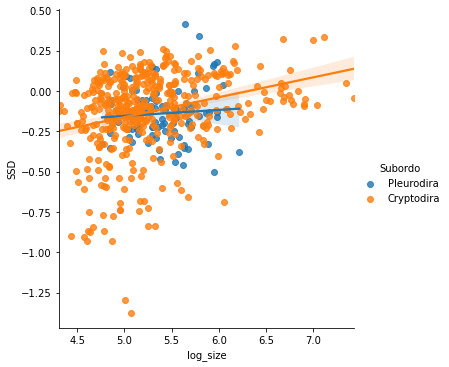

In [31]:
sns.lmplot(x='log_size', y='SSD', data=D, hue='Subordo');

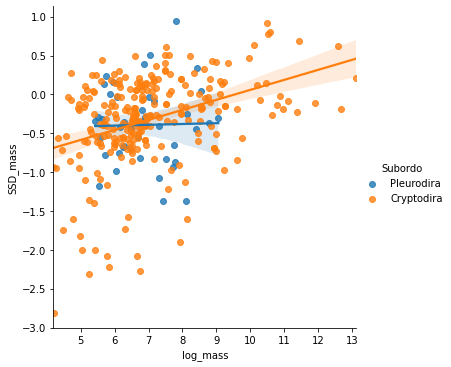

In [32]:
sns.lmplot(x='log_mass', y='SSD_mass', data=D, hue='Subordo');

Хотя у Скрытошейных намечается положительный наклон зависимости, облако значений достаточно рыхлое, особенно в области низких значений массы.

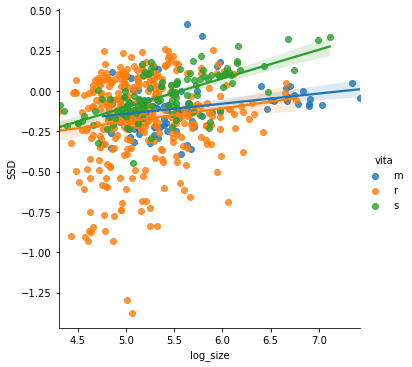

In [33]:
sns.lmplot(x='log_size', y='SSD', data=D, hue='vita');

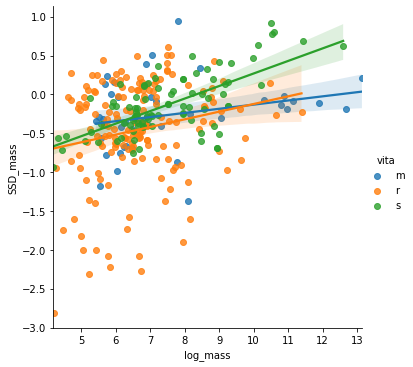

In [34]:
sns.lmplot(x='log_mass', y='SSD_mass', data=D, hue='vita');

При группировке по образу жизни чётко обособляется группа сухопутных черепах с сильно выраженной аллометрией. У мелких видов самцы всегда мельче (показатель ниже 0), у крупных - самцы всегда больше (показатель больше 0). При средних размерах встречаются разные варианты.
У черепах, живущих в воде, фактор размера видимо менее значим, поскольку нет необходимости перемещения тяжелого панциря на ногах.

После получения качественного решения можно получить количественные значения коэффициентов отобранных моделей зависимостей. Для этого для каждой группы нужно сделать анализ с помощью функции `polyfit` или пакета `statmodels`, с которыми мы познакомимся в следующих разделах.